In [25]:
import pandas as pd
import datetime
import numpy as np

In [26]:
#the data is loaded from the source.
#parse_time is used to define date columns in the dataframe
df = pd.read_csv("C:/Users/Koparan/Desktop/DataPolito/DataScienceLab/laboratory/solutions/lab5/q2_flightDelay/831394006_T_ONTIME.csv",
                parse_dates=['FL_DATE','CRS_DEP_TIME','DEP_TIME',
                            'CRS_ARR_TIME','ARR_TIME'])

In [27]:
#juptyer does not show all columns as default if there are a lot of column
#we use set_option with max_columns to see all columns with 5 rows with the help of head()
l = len(df.columns)
pd.set_option('display.max_columns', l)
df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 32
0,2017-01-01,AA,19805,N787AA,1,12478,1247803,31703,JFK,"New York, NY",12892,1289204,32575,LAX,"Los Angeles, CA",0800,0831,31.0,25.0,856.0,1143.0,26.0,1142,1209,27.0,0.0,NaN,27.0,0.0,0.0,0.0,0.0,NaN
1,2017-01-01,AA,19805,N783AA,2,12892,1289204,32575,LAX,"Los Angeles, CA",12478,1247803,31703,JFK,"New York, NY",0900,0934,34.0,34.0,1008.0,1757.0,12.0,1727,1809,42.0,0.0,NaN,34.0,0.0,8.0,0.0,0.0,NaN
2,2017-01-01,AA,19805,N791AA,4,12892,1289204,32575,LAX,"Los Angeles, CA",12478,1247803,31703,JFK,"New York, NY",1130,1221,51.0,20.0,1241.0,2025.0,15.0,1958,2040,42.0,0.0,NaN,7.0,0.0,0.0,0.0,35.0,NaN
3,2017-01-01,AA,19805,N391AA,5,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",12173,1217302,32134,HNL,"Honolulu, HI",1135,1252,77.0,19.0,1311.0,1744.0,5.0,1612,1749,97.0,0.0,NaN,77.0,0.0,20.0,0.0,0.0,NaN
4,2017-01-01,AA,19805,N346AA,6,13830,1383002,33830,OGG,"Kahului, HI",11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",1855,1855,0.0,16.0,1911.0,631.0,11.0,0600,0642,42.0,0.0,NaN,0.0,0.0,42.0,0.0,0.0,NaN


1) which type does each column have?
2) are there any missing values?
3) how many unique carriers are present?
4) how many unique airports are present?
5) from which time interval data were collected?

In [28]:
df.info()
#we can see that there are some missing values on Time columns such as DEP_TIME
#ARR_TIME has the lowest number of non-null values(440,746). 
#So the time analysis can be done this number of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   FL_DATE                450017 non-null  datetime64[ns]
 1   UNIQUE_CARRIER         450017 non-null  object        
 2   AIRLINE_ID             450017 non-null  int64         
 3   TAIL_NUM               449378 non-null  object        
 4   FL_NUM                 450017 non-null  int64         
 5   ORIGIN_AIRPORT_ID      450017 non-null  int64         
 6   ORIGIN_AIRPORT_SEQ_ID  450017 non-null  int64         
 7   ORIGIN_CITY_MARKET_ID  450017 non-null  int64         
 8   ORIGIN                 450017 non-null  object        
 9   ORIGIN_CITY_NAME       450017 non-null  object        
 10  DEST_AIRPORT_ID        450017 non-null  int64         
 11  DEST_AIRPORT_SEQ_ID    450017 non-null  int64         
 12  DEST_CITY_MARKET_ID    450017 non-null  int6

In [29]:
#We can see the mean, min and max values of delay data with describe function
#Also, other descriptive analysis values might be helpful 
df[['DEP_DELAY','CARRIER_DELAY','WEATHER_DELAY',
    'NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].describe()

,DEP_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,441476.000000,97699.000000,97699.000000,97699.000000,97699.000000,97699.000000
mean,12.134768,20.308836,3.368857,15.742495,0.079745,24.947492
std,47.274204,60.649157,27.809756,32.328181,2.896287,47.850860
min,-59.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,0.000000,0.000000,4.000000,0.000000,3.000000
75%,10.000000,17.000000,0.000000,20.000000,0.000000,31.000000
max,2755.000000,1934.000000,1934.000000,1457.000000,653.000000,1392.000000


In [30]:
#unique carriers
print(f"The number of unique carriers are: {df['UNIQUE_CARRIER'].nunique()}")
#unique airports (we concat origin and destination airport to not to miss any)
a = pd.concat([df['ORIGIN_AIRPORT_ID'],df['DEST_AIRPORT_ID']],ignore_index=True)
print(f"The number of unique airports are: {a.nunique()}")
#time interval of data were collected
print(f"The start date of the data collection is: {df['FL_DATE'].min()}")
print(f"The finish date of the data collection is: {df['FL_DATE'].max()}")
print(f"Data is collected for {(df['FL_DATE'].max()-df['FL_DATE'].min()).days} days")

The number of unique carriers are: 12
The number of unique airports are: 298
The start date of the data collection is: 2017-01-01 00:00:00
The finish date of the data collection is: 2017-01-31 00:00:00
Data is collected for 30 days


Filter out all canceled flights

In [31]:
#first see the number of cancelled and not cancelled counts with value_counts()
print(df.CANCELLED.value_counts())
#it shows that we should end up with 441,131 rows when we filter out cancelled ones
df = df[df['CANCELLED']==0]
print(len(df)) 

0.0    441131
1.0      8886
Name: CANCELLED, dtype: int64
441131


how many flights had each carrier operated?

In [32]:
pv = pd.DataFrame.pivot_table(df,values='FL_NUM',index='UNIQUE_CARRIER',
                              aggfunc='count',fill_value=0,margins=True,margins_name='Total Flights')
pv

,FL_NUM
UNIQUE_CARRIER,
AA,72152
AS,14454
B6,24077
DL,69031
EV,33878
F9,7598
HA,6258
NK,12129
OO,48266


for each carrier, compute the mean delay considering all possible reasons (due to the carrier, weather, etc.)

In [33]:
#first drop the unnecessary column: 'Unnamed:32' which is full null
df.drop(columns='Unnamed: 32',inplace=True)

In [34]:
#select delay related columns for pivot table
delayColumns = list(df.columns)[-5:]
pv2 = df.pivot_table(values=delayColumns, index='UNIQUE_CARRIER',
                     aggfunc='mean', dropna=False).round(1) #round is used to truncate numbers to 1 decimal
pv2

,CARRIER_DELAY,LATE_AIRCRAFT_DELAY,NAS_DELAY,SECURITY_DELAY,WEATHER_DELAY
UNIQUE_CARRIER,,,,,
AA,18.7,18.7,15.4,0.2,2.4
AS,11.7,19.2,18.6,0.2,3.8
B6,20.3,29.3,15.2,0.3,1.4
DL,30.9,22.0,16.8,0.0,9.6
EV,36.3,31.7,15.8,0.0,1.4
F9,16.7,31.1,19.1,0.0,0.9
HA,29.9,14.1,0.3,0.1,0.9
NK,9.1,12.1,43.8,0.0,0.7
OO,23.5,31.3,15.2,0.1,4.6


Add 'weekday' (day expressed as an integer number) and 'delaydelta' (time difference between arrival and departure) columns to your DataFrame

In [35]:
#dayofweek attribute is used to get day of week from a date (start Monday (0) to Sunday(6))
df['weekday'] = df['FL_DATE'].dt.dayofweek
#delay delta calculation
df['delaydelta'] = df['ARR_DELAY'] - df['DEP_DELAY']
df[['FL_DATE','weekday','ARR_DELAY','DEP_DELAY','delaydelta']].head()

,FL_DATE,weekday,ARR_DELAY,DEP_DELAY,delaydelta
0,2017-01-01,6,27.0,31.0,-4.0
1,2017-01-01,6,42.0,34.0,8.0
2,2017-01-01,6,42.0,51.0,-9.0
3,2017-01-01,6,97.0,77.0,20.0
4,2017-01-01,6,42.0,0.0,42.0


Choose one of the visualization tools that you know and inspect the arrival delay as a function of the
day of the week. Can you find any correlation?


             ARR_DELAY
weekday               
0                 10.9
1                  3.7
2                  2.4
3                  4.9
4                  4.9
5                  7.9
6                 12.9
generalMean        7.0

We can see that Monday and Sunday has the highest average delay values. Also Wednesday has the lowest average delay value



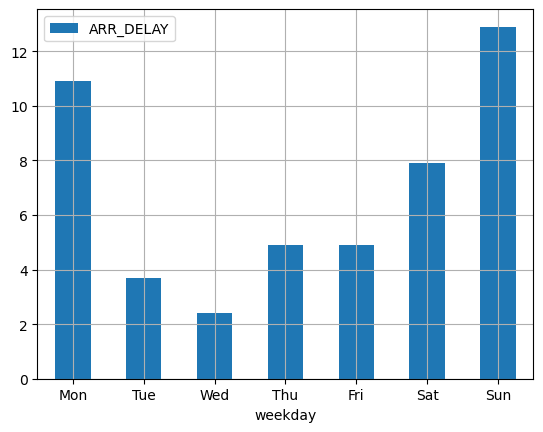

In [36]:
pv3 = pd.pivot_table(df,values='ARR_DELAY',
                     index='weekday', aggfunc='mean',
                     margins=True, margins_name='generalMean',
                     sort=True, dropna=False).round(1)
print(pv3)

import calendar
daynames = list(calendar.day_abbr)
pv3.drop(index='generalMean',inplace=True)
pv3.reset_index(inplace=True)
pv3.weekday = pv3.weekday.apply(lambda x: daynames[x])
pv3.plot(x='weekday', kind='bar', stacked=False, grid=True)
import matplotlib.pyplot as plt
plt.xticks(rotation=0)
print('\nWe can see that Monday and Sunday has the highest average delay values. Also Wednesday has the lowest average delay value\n')

<AxesSubplot: title={'center': 'ARR_DELAY'}, xlabel='weekday'>

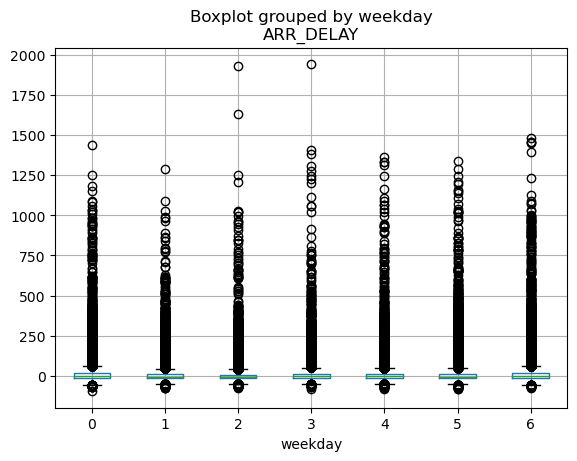

In [37]:
df.boxplot(column='ARR_DELAY',by='weekday')

When we eliminate outliers, we see that there is no significant effect of days on ARR_DELAY


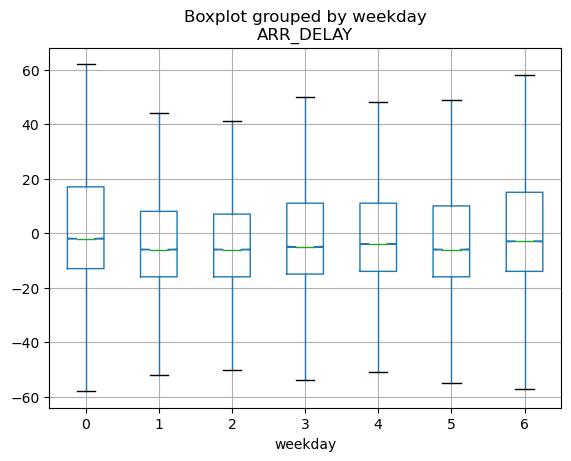

In [38]:
df.boxplot(column='ARR_DELAY',by='weekday',
           notch=True, #notch is used to show 95% confidence interval
           showfliers=False) #used not to show outliers

print('When we eliminate outliers, we see that there is no significant effect of days on ARR_DELAY')

Consider the weekend days only, compute, for each carrier, the mean arrival delay. Now consider
the working days and compute, for each carrier, the mean arrival time.
Then, compare the delays in working days and in weekends for each company.


In [39]:
#first create the weekand and weedays table
wEnd_idx = df.weekday.isin([5,6])
df_wEnd = df[wEnd_idx]
df_wDay = df[~wEnd_idx]

In [40]:
g1 = pd.DataFrame(df_wEnd.groupby('UNIQUE_CARRIER')['ARR_DELAY'].mean())
g1.rename(columns={'ARR_DELAY':'Weekend_ARR_DELAY'},inplace=True)
g2 = pd.DataFrame(df_wDay.groupby('UNIQUE_CARRIER')['ARR_DELAY'].mean())
g2.rename(columns={'ARR_DELAY':'Weekday_ARR_DELAY'},inplace=True)

gcompare = pd.concat([g1,g2],axis=1)
gcompare['wEnd-wDay'] = gcompare['Weekend_ARR_DELAY'] - gcompare['Weekday_ARR_DELAY']
gcompare

,Weekend_ARR_DELAY,Weekday_ARR_DELAY,wEnd-wDay
UNIQUE_CARRIER,,,
AA,6.298535,2.214675,4.083860
AS,6.016572,2.254182,3.762390
B6,16.044561,5.609369,10.435193
DL,23.363615,-1.840765,25.204379
EV,17.592522,11.817625,5.774897
F9,8.118907,13.690379,-5.571472
HA,5.410840,2.866092,2.544748
NK,10.667156,8.338504,2.328652
OO,9.654595,13.511521,-3.856926


DL carrier has different manner. It has no delay, even early, in weekdays. However, it has the largest average delay in weekend
AA,AS,HA and UA has small amount of delay in general. Their weekend delays are also larger than weekdays
EV and VX carriers have both large amount of weekday and weekend delay


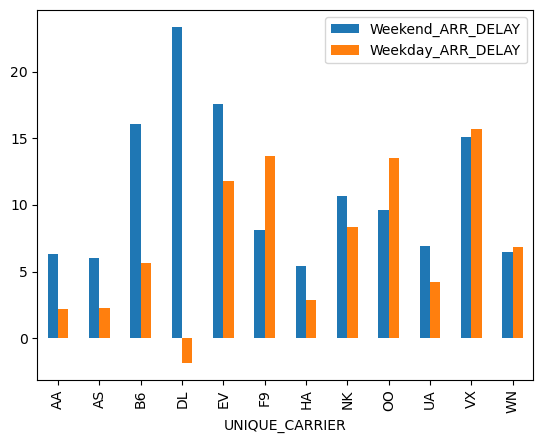

In [41]:
gcompare.plot(kind='bar', y=['Weekend_ARR_DELAY','Weekday_ARR_DELAY'])
print('DL carrier has different manner. It has no delay, even early, in weekdays. However, it has the largest average delay in weekend')
print('AA,AS,HA and UA has small amount of delay in general. Their weekend delays are also larger than weekdays')
print('EV and VX carriers have both large amount of weekday and weekend delay')

Create a Pandas DataFrame with a multi-index composed of the columns: unique_carrier, origin, dest, fl_date.

In [62]:
multidf = df.set_index(['UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'FL_DATE'])
multidf

AIRLINE_ID TAIL_NUM  FL_NUM  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                   
AA             JFK    LAX  2017-01-01       19805   N787AA       1   
               LAX    JFK  2017-01-01       19805   N783AA       2   
                           2017-01-01       19805   N791AA       4   
               DFW    HNL  2017-01-01       19805   N391AA       5   
               OGG    DFW  2017-01-01       19805   N346AA       6   
...                                           ...      ...     ...   
NK             FLL    MSP  2017-01-31       20416   N625NK     596   
               MSP    FLL  2017-01-31       20416   N613NK     597   
               ATL    PHL  2017-01-31       20416   N505NK     600   
               FLL    ATL  2017-01-31       20416   N505NK     600   
                      LGA  2017-01-31       20416   N613NK     604   

                                       ORIGIN_AIRPORT_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                         
AA             JFK    LAX  2017-01-01              12478   
               LAX    JFK  2017-01-01              12892   
                           2017-01-01              12892   
               DFW    HNL  2017-01-01              11298   
               OGG    DFW  2017-01-01              13830   
...                                                  ...   
NK             FLL    MSP  2017-01-31              11697   
               MSP    FLL  2017-01-31              13487   
               ATL    PHL  2017-01-31              10397   
               FLL    ATL  2017-01-31              11697   
                      LGA  2017-01-31              11697   

                                       ORIGIN_AIRPORT_SEQ_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                             
AA             JFK    LAX  2017-01-01                1247803   
               LAX    JFK  2017-01-01                1289204   
                           2017-01-01                1289204   
               DFW    HNL  2017-01-01                1129804   
               OGG    DFW  2017-01-01                1383002   
...                                                      ...   
NK             FLL    MSP  2017-01-31                1169704   
               MSP    FLL  2017-01-31                1348702   
               ATL    PHL  2017-01-31                1039705   
               FLL    ATL  2017-01-31                1169704   
                      LGA  2017-01-31                1169704   

                                       ORIGIN_CITY_MARKET_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                             
AA             JFK    LAX  2017-01-01                  31703   
               LAX    JFK  2017-01-01                  32575   
                           2017-01-01                  32575   
               DFW    HNL  2017-01-01                  30194   
               OGG    DFW  2017-01-01                  33830   
...                                                      ...   
NK             FLL    MSP  2017-01-31                  32467   
               MSP    FLL  2017-01-31                  31650   
               ATL    PHL  2017-01-31                  30397   
               FLL    ATL  2017-01-31                  32467   
                      LGA  2017-01-31                  32467   

                                            ORIGIN_CITY_NAME  DEST_AIRPORT_ID  \
UNIQUE_CARRIER ORIGIN DEST FL_DATE                                              
AA             JFK    LAX  2017-01-01           New York, NY            12892   
               LAX    JFK  2017-01-01        Los Angeles, CA            12478   
                           2017-01-01        Los Angeles, CA            12478   
               DFW    HNL  2017-01-01  Dallas/Fort Worth, TX            12173   
               OGG    DFW  2017-01-01            Kahului, HI            11298   
...                                                      ...              ...   
NK             FLL    MSP  2017-0

**9.** For each flight operated by American Airlines (AA) and Delta Airlines (DL), taken off from the Los
Angeles International Airport (LAX) and for each date, display the departure time and delay.


In [63]:
ix = pd.IndexSlice

In [99]:
pd.reset_option('display.max_rows')
multidf.loc[ix[['AA','DL'],'LAX'],['DEP_TIME','DEP_DELAY']]

DEP_TIME  DEP_DELAY
UNIQUE_CARRIER ORIGIN DEST FL_DATE                       
AA             LAX    ATL  2017-01-01     1051       16.0
                           2017-01-01     1747      137.0
                           2017-01-02     1548       18.0
                           2017-01-02     2230       40.0
                           2017-01-02     1055       20.0
...                                        ...        ...
DL             LAX    TPA  2017-01-26     1146        1.0
                           2017-01-27     1137       -3.0
                           2017-01-29     1149        4.0
                           2017-01-30     1142       -3.0
                           2017-01-31     1206       21.0

[5437 rows x 2 columns]

**10.** For each flight that flew in the first week of the month, with LAX as destination airport, compute the
mean arrival delay.

In [105]:
ix = pd.IndexSlice
multidf.sort_index(axis=0, level = [0,1,2,3], inplace=True)
fw_df = multidf.loc[ix[:,:,'LAX','2017-01-01':'2017-01-08'],:]
fw_df.groupby('FL_NUM')['ARR_DELAY'].mean()


FL_NUM
1        0.000000
2       60.000000
4       11.625000
5        2.875000
7       16.750000
          ...    
6344    47.000000
6354    60.000000
6522    49.666667
6563    -8.000000
6710    10.000000
Name: ARR_DELAY, Length: 1105, dtype: float64

**11.** Generate a pivot table containing the number of departed flights for each carrier and for each day of the week and show it. Compute now the pairwise correlation between the carriers and show it on a heatmap.

• What does this correlation matrix represent?

• Can you find any carrier with different flight plans?


In [115]:
pv_corr = df.pivot_table(index='UNIQUE_CARRIER',columns='weekday',
                        values='FL_NUM', aggfunc='count')
pv_corr

weekday,0,1,2,3,4,5,6
UNIQUE_CARRIER,,,,,,,
AA,12035,11457,9651,9854,9820,7905,11430
AS,2440,2261,1806,1935,1953,1762,2297
B6,4063,3942,3143,3258,3169,2643,3859
DL,12157,11512,9248,9695,9521,6492,10406
EV,5935,5649,4627,4923,4774,2905,5065
F9,1239,1214,976,983,986,955,1245
HA,987,966,791,802,864,826,1022
NK,1954,1970,1616,1610,1563,1470,1946
OO,8321,7912,6413,6631,6667,4913,7409


In [124]:
import seaborn as sns

<AxesSubplot: xlabel='UNIQUE_CARRIER', ylabel='UNIQUE_CARRIER'>

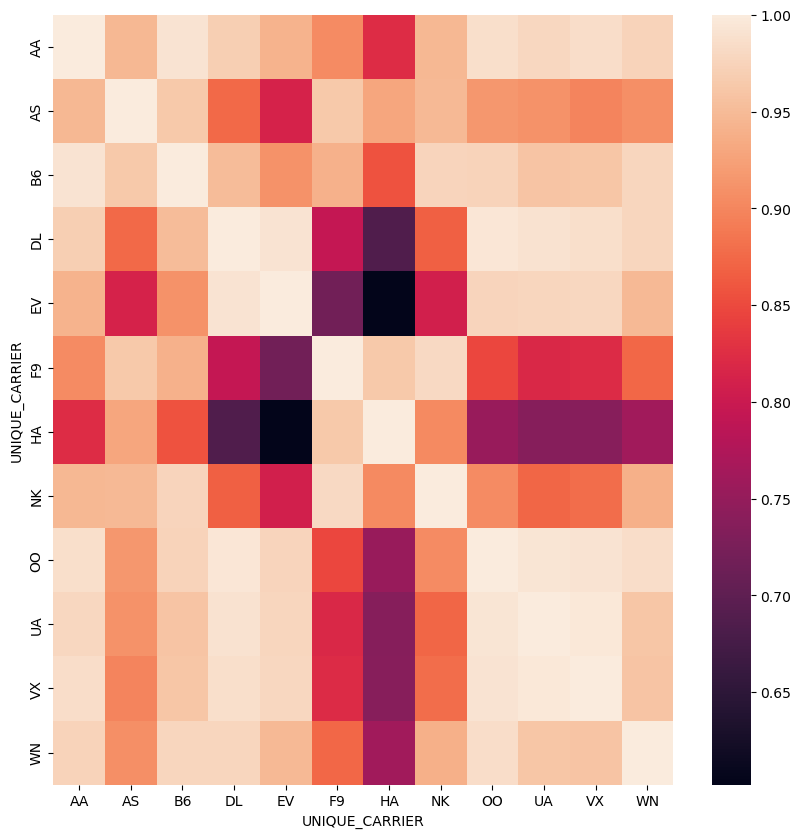

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(pv_corr.T.corr())

In [128]:
print('This correlation matrix represent having the similar schedule among carriers.')
print("If the value become closer to 1, it means that the corresponding carries have similar schedule\n")
print('HA has very different schedule from other whereas DL,UA and VX have similar schedule with other companies')

This correlation matrix represent having the similar schedule among carriers.
If the value become closer to 1, it means that the corresponding carries have similar schedule

HA has very different schedule from other whereas DL,UA and VX have similar schedule with other companies


**12.** Generate a pivot table containing the average arrival delay, for each carrier and for each day of the week and show it.
Compute now the pairwise correlation between the carriers and show it on a heatmap.

• What does this correlation matrix represent?

• Can you find any carrier with different delay behaviors?

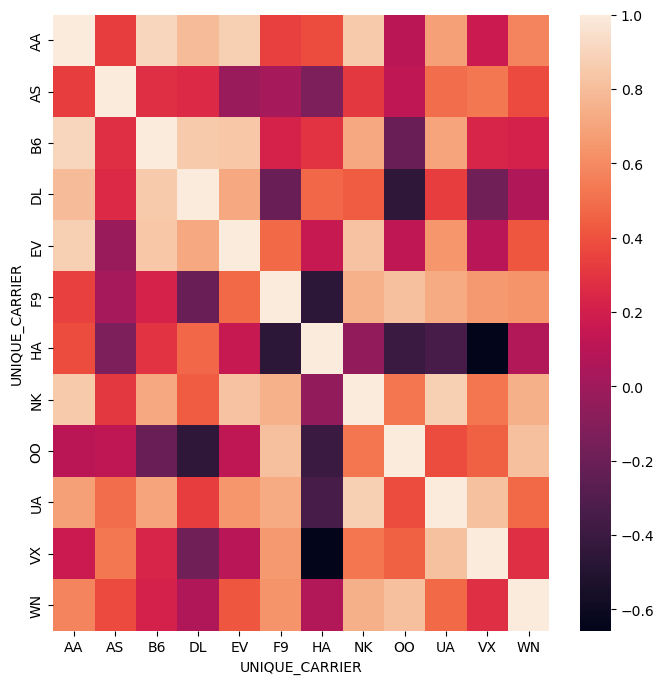

In [135]:
pv_corr2 = df.pivot_table(index='UNIQUE_CARRIER',columns='weekday',
                         values='ARR_DELAY', aggfunc='mean').round(1)
pv_corr2
plt.figure(figsize=(8,8))
_ = sns.heatmap(pv_corr2.T.corr())

In [137]:
print('This correlation matrix represent having the similar arrival delay among carriers.')
print("If the value become closer to 1, it means that the corresponding carries have similar arrival delay as an avarage")
print('If the value become closer to 0, it means that there is no correlation between arrival delays of corresponding carriers')
print('If the value become closer to -1, it means that the corresposding carriers have negative relation for arrival delay. For example, If one of them increases in one day, the other have small amount of arrival delay\n')
print('VX and HA has negative correlation. (NK,AA) and (DL,B6) shows similarity on arrival delays')

This correlation matrix represent having the similar arrival delay among carriers.
If the value become closer to 1, it means that the corresponding carries have similar arrival delay as an avarage
If the value become closer to 0, it means that there is no correlation between arrival delays of corresponding carriers
If the value become closer to -1, it means that the corresposding carriers have negative relation for arrival delay. For example, If one of them increases in one day, the other have small amount of arrival delay

VX and HA has negative correlation. (NK,AA) and (DL,B6) shows similarity on arrival delays


**13.** Using a pivot table, for the carriers HA, DL, AA and AS compute the average deltadelay for each day of the week. Then, display the results on a line plot, having a line per carrier and the weekday on the x-axis.

In [142]:
pv_line = df[df['UNIQUE_CARRIER'].isin(['HA','DL','AA','AS'])].pivot_table(index='UNIQUE_CARRIER',
                                                                          columns='weekday',
                                                                          values='delaydelta',
                                                                          aggfunc='mean')
pv_line

weekday,0,1,2,3,4,5,6
UNIQUE_CARRIER,,,,,,,
AA,-3.576209,-4.621619,-4.601184,-4.091436,-3.553686,-4.558771,-3.747053
AS,-1.690789,-1.625446,-1.889198,-2.130705,-2.624551,-3.453872,0.542632
DL,-8.913563,-10.211625,-10.544913,-10.604603,-9.623199,-5.979988,-7.001644
HA,0.258359,0.307772,0.759189,0.390762,0.746528,1.330508,1.207066


<AxesSubplot: xlabel='weekday'>

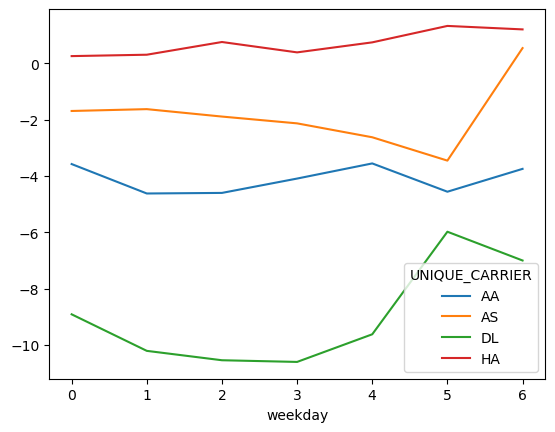

In [146]:
pv_line.T.plot(kind='line')